In [1]:
import csv  #The most common import and export format for spreadsheets and databases.

#This is for extracting the data for the file "rays_monthly.txt" which would be used later....
with open('rays_monthly.txt') as raysfile:
    readRAYS = csv.reader(raysfile, delimiter=' ')  #Since there are spaces on the .txt file separating the values, the
                                                    #delimiter is just those empty spaces, or a single space based on
                                                    #what it shows on the .txt file.
    
    Fractional_Date_Rays = []  #I'm just naming these that corresponds to the values. Also, it's an empty set that is
                               #going to be appended with those values later.
    Uncorrected_Count_Rates = []
    Corrected = []
    Barometric_Pressure = []
    
    for row in readRAYS:  #The corresponding values that belong to that name.
        Fractional_Date_Rays.append(row[0])  #Fractional Date [year].
        Uncorrected_Count_Rates.append(row[1])  #Uncorrected Count Rates [counts/min].
        Corrected.append(row[2])  #Corrected (for pressure and efficiency) count rates [counts/min].
        Barometric_Pressure.append(row[3])  #Barometric Pressure [mbar].


#This is for extracting the data for the file "sunspots_monthly.txt" which would be used later....
with open('sunspots_monthly.txt') as spotsfile:
    readSPOTS = csv.reader(spotsfile, delimiter=' ')
    
    Fractional_Date_Spots = []
    Month_Mean_Total_Spots = []
    Month_Mean_Sigma = []
    Num_Obs_Month_Mean = []
    
    for row in readSPOTS:
        Fractional_Date_Spots.append(row[0])  #Fractional Date [year].
        Month_Mean_Total_Spots.append(row[1])  #Monthly Mean Total Sunspot Number.
        Month_Mean_Sigma.append(row[2])  #Monthly Mean Standard Deviation.
        Num_Obs_Month_Mean.append(row[3])  #Number of Observations Used to Compute the Monthly Mean.

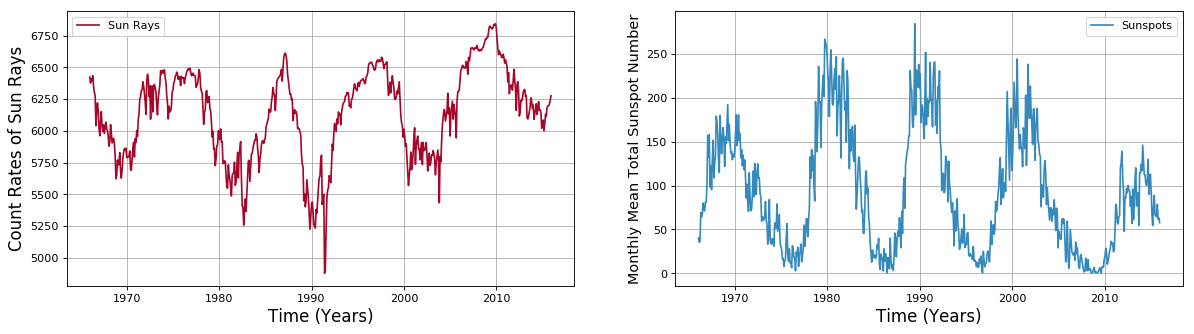

In [37]:
#Installing the necessary packages....

import numpy as np  #This is the core library for scientific computing. Provides a high-performance multidimensional
                    #array object, and tools for working with these arrays.
import matplotlib.pyplot as plt  #Provides a MATLAB-like plotting framework.
from pylab import *  #This should include the core parts of numpy, scipy, and matplotlib.
from scipy import *  #contains additional routines needed in scientific work: for example, routines for computing
                     #integrals numerically, solving differential equations, optimization, and sparse matrices.
from scipy import fftpack  #This is for the Fast Fourier Transform (FFT) package which would be used later.

#These are just plots I'm going to use for the latex...

#For the subplots of Rays and Sunspots...

f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');

#Corrected Count Rates of Rays:
sp = f.add_subplot(2, 2, 1);
plt.plot(Fractional_Date_Rays, Corrected, '-', color="#A60628", label='Sun Rays');
plt.xlabel("Time (Years)", fontsize=15);
plt.ylabel("Count Rates of Sun Rays", fontsize=15);
plt.legend(loc='best', fontsize=10);
grid(True)

#Monthly Mean Total Sunspot Number:
sp = f.add_subplot(2, 2, 2);
plt.plot(Fractional_Date_Spots, Month_Mean_Total_Spots, '-', color="#348ABD", label='Sunspots');
plt.xlabel("Time (Years)", fontsize=15);
plt.ylabel("Monthly Mean Total Sunspot Number", fontsize=13);
plt.legend(loc='best', fontsize=10);
grid(True)

plt.show()

/Users/cliccuser/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


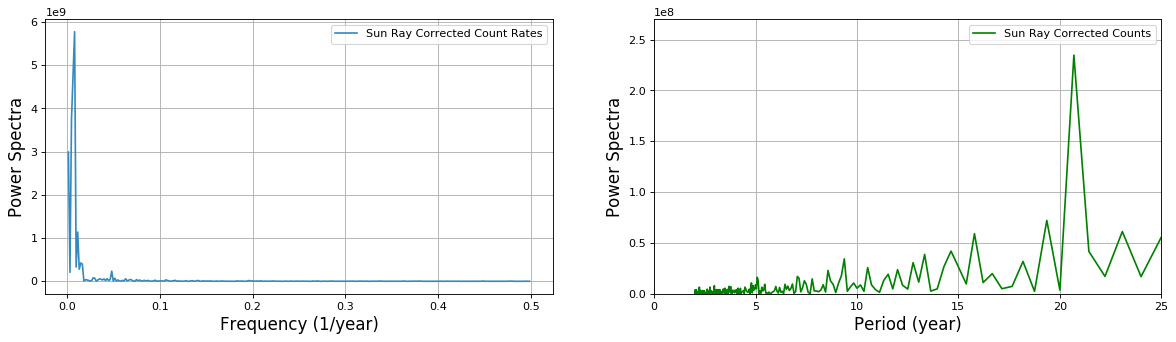

In [71]:
#For Number 1

#This is for the Corrected Count Rates Sun Rays:

Y_Rays=fft(Corrected);  #This is for the Fast Fourier Transform of Corrected Count Rates Sun Rays.

N_Rays=len(Y_Rays);  #This takes the number of elements from the FFT, or N regularly spaced points.
Power_Rays = abs(Y_Rays[1:(N_Rays//2)])**2;  #Explain...
Nyquist=1./2;  #The Nyquist frequency which is equal to half the maximum frequency.
Freq_Rays=array(range(N_Rays//2))/(N_Rays//2.0)*Nyquist;  #This converts the FFT number of elements into a frequency
                                                          #based on the Nyquist, and will be used for plotting.
Period_Rays=1./Freq_Rays;  #This converts the frequency into a period in order to locate the year of the peak.

f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');  #This is to make subplots.

#Power Spectra of the Corrected Count Rate, but in Frequency (1/year):
sp = f.add_subplot(2, 2, 1);
plt.plot(Freq_Rays[1:len(Freq_Rays)], Power_Rays, '-', color="#348ABD", label='Sun Ray Corrected Count Rates');
plt.xlabel("Frequency (1/year)", fontsize=15);
plt.ylabel("Power Spectra", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

#Power Spectra of the Corrected Count Rate, but in Period (year):
sp = f.add_subplot(2, 2, 2);
plt.plot(Period_Rays[1:len(Period_Rays)], Power_Rays, '-', color="green", label='Sun Ray Corrected Counts');
plt.xlabel("Period (year)", fontsize=15);
plt.ylabel("Power Spectra", fontsize=15);
plt.axis([0, 25, 0, 270000000]);  #Lots of zeroes because of I'm trying to scale to the actual size of it.
plt.legend(loc='best', fontsize=10);
plt.grid(True)

plt.show()

#Seems like the sun rays occur with a maximum in activity approximately every 21 years.

/Users/cliccuser/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


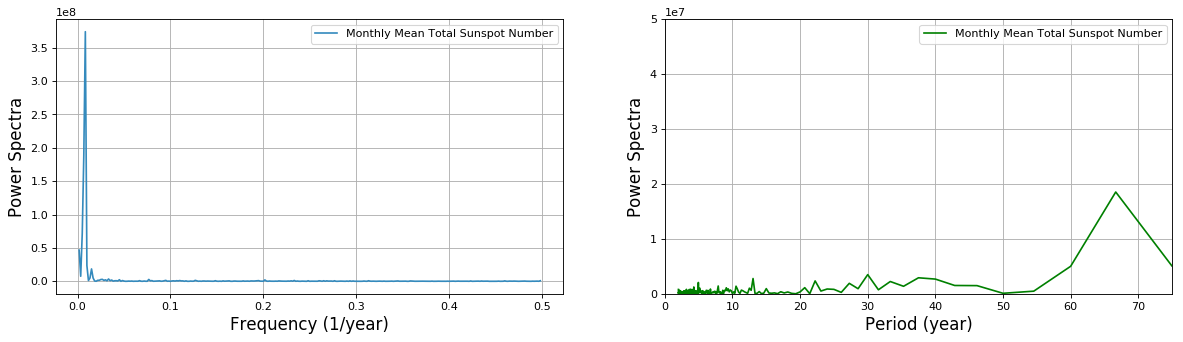

In [39]:
#This is for the Monthly Mean Total Sunspot Number

Y_Spots=fft(Month_Mean_Total_Spots);  #This is for the Fast Fourier Transform of the Monthly Mean Total Sunspot Number.

N_Spots=len(Y_Spots);  #The explanation is the same as above.
Power_Spots = abs(Y_Spots[1:(N_Spots//2)])**2;
Freq_Spots=array(range(N_Spots//2))/(N_Spots//2.0)*Nyquist;
Period_Spots=1./Freq_Spots;

f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');

#Power Spectra of the Monthly Mean Total Sunspot Number, but in Frequency (1/year):
sp = f.add_subplot(2, 2, 1);
plt.plot(Freq_Spots[1:len(Freq_Spots)], Power_Spots, '-', color="#348ABD", label='Monthly Mean Total Sunspot Number');  #Explain...
plt.xlabel("Frequency (1/year)", fontsize=15);
plt.ylabel("Power Spectra", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

#Power Spectra of the Monthly Mean Total Sunspot Number, but in Period (year):
sp = f.add_subplot(2, 2, 2);
plt.plot(Period_Spots[1:len(Period_Spots)], Power_Spots, '-', color="green", label='Monthly Mean Total Sunspot Number');  #Explain...
plt.xlabel("Period (year)", fontsize=15);
plt.ylabel("Power Spectra", fontsize=15);
plt.axis([0, 75, 0, 50000000]);  #Lots of zeroes because of I'm trying to scale to the actual size of it.
plt.legend(loc='best', fontsize=10);
plt.grid(True)

plt.show()

#Seems like the sunspots occur with a maximum in activity approximately every 67 years.

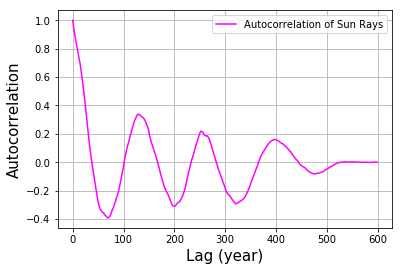

In [40]:
#For Number 2

#For this problem, I could not figure out how to do this on time since I had other assignments, but I did it in another
#way where....expected value E
#Explain why you didn't use the FFT way, and also describe how this works.....

#For the Corrected Count Rates Sun Rays:

Fixed_Rays = np.array(Corrected).astype(np.float);  #I did this because it was not reading the original values
                                                    #which made me make it into this format. I guess it just had only
                                                    #strings which it did not like.

y_Rays = Fixed_Rays - np.mean(Fixed_Rays);  #This is the definition of the Corrected values and subtract it from the
                                            #mean Corrected Values.
norm_Rays = np.sum(y_Rays ** 2);  #Normalization of the values
AutoCorrelated_Rays = np.correlate(y_Rays, y_Rays, mode='full')/norm_Rays;  #This uses the np.correlate such as 
                                                                            #describe in the pdf article for this lab.
                                                                            #It also normalizes the values as describe
                                                                            #as well in the pdf article.
res_Rays = AutoCorrelated_Rays[len(AutoCorrelated_Rays)//2:];  #This transforms it into a time lag.

plt.plot(res_Rays, '-', color="magenta", label='Autocorrelation of Sun Rays');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Autocorrelation", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

plt.show()

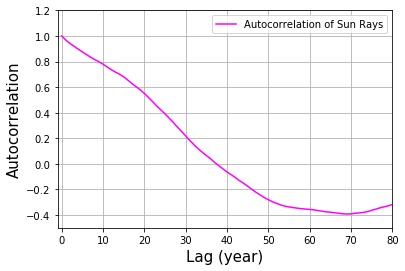

In [54]:
#A closer view...

plt.plot(res_Rays, '-', color="magenta", label='Autocorrelation of Sun Rays');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Autocorrelation", fontsize=15);
plt.axis([-1, 80, -0.5, 1.2]);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

plt.show()

#Based on when it dips, the length of the cosmic ray cycle is about 70 years.

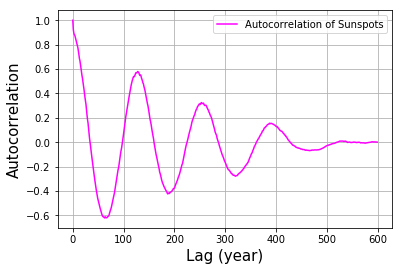

In [41]:
#For the Monthly Mean Total Sunspot Number:

Fixed_Spots = np.array(Month_Mean_Total_Spots).astype(np.float);  #This explanation of this is the same as above, but
                                                                  #it is applied for the Sunspots.

y_Spots = Fixed_Spots - np.mean(Fixed_Spots);  #The explanation is the same as above.
norm_Spots = np.sum(y_Spots ** 2);
AutoCorrelated_Spots = np.correlate(y_Spots, y_Spots, mode='full')/norm_Spots;
res_Spots = AutoCorrelated_Spots[len(AutoCorrelated_Spots)//2:];

plt.plot(res_Spots, '-', color="magenta", label='Autocorrelation of Sunspots');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Autocorrelation", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True);

plt.show()

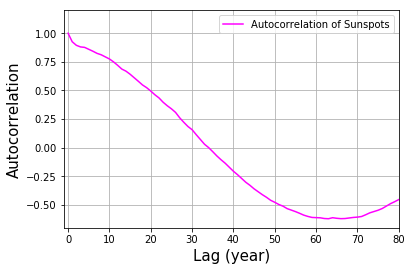

In [57]:
#A closer view...

plt.plot(res_Spots, '-', color="magenta", label='Autocorrelation of Sunspots');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Autocorrelation", fontsize=15);
plt.axis([-1, 80, -0.7, 1.2]);
plt.legend(loc='best', fontsize=10);
plt.grid(True);

plt.show()

#Based on when it dips, the length of the solar cycle is about 65 years.

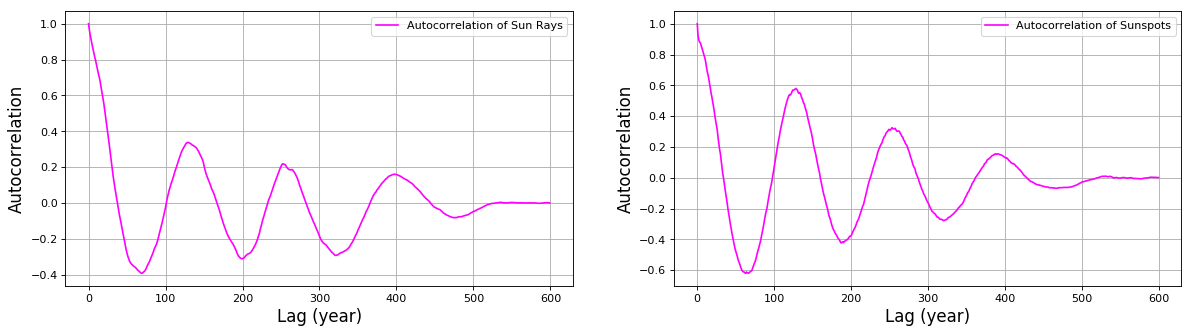

In [42]:
#Just making subplots for latex...

f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');

#For the Corrected Count Rates Sun Rays:
sp = f.add_subplot(2, 2, 1);
plt.plot(res_Rays, '-', color="magenta", label='Autocorrelation of Sun Rays');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Autocorrelation", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

#For the Monthly Mean Total Sunspot Number:
sp = f.add_subplot(2, 2, 2);
plt.plot(res_Spots, '-', color="magenta", label='Autocorrelation of Sunspots');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Autocorrelation", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True);

plt.show()

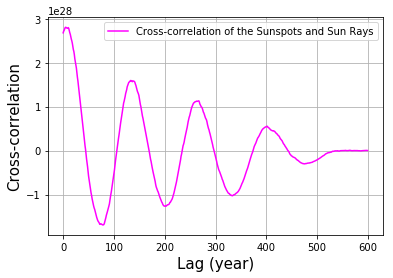

In [43]:
#Number 3

#Describe this a little bit. It's basically the same thing as above, and why you did not use FFT....

#Cross-Correlation of Sunspots and Sun Rays:

Cross_norm = np.sum(y_Rays) * np.sum(y_Spots);  #This would be the combination of the normalized values of the Sun Rays
                                                #and Sunspots.
CrossCorrelated = np.correlate(y_Rays, y_Spots, mode='full')/Cross_norm;  #The definition of the Cross-Correlation of
                                                                          #Sunspots and Sun Rays.
res_Cross = CrossCorrelated[len(CrossCorrelated)//2:];  #Explanation amounts the same as above.

plt.plot(res_Cross, '-', color="magenta", label='Cross-correlation of the Sunspots and Sun Rays');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Cross-correlation", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

plt.show()

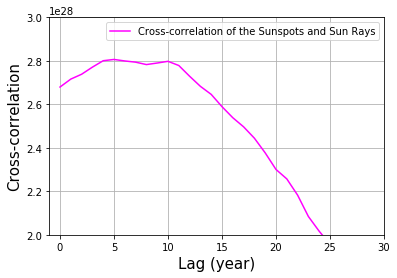

In [69]:
#Getting a better view, it is also to answer the questions in Number 4...

plt.plot(res_Cross, '-', color="magenta", label='Cross-correlation of the Sunspots and Sun Rays');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Cross-correlation", fontsize=15);
plt.axis([-1, 30, 2e28, 3e28]);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

plt.show()

#Looks like the value of the Cross-Correlation is at approximately 2.7x10^28. The global minimum is of the
#Cross-Correlation is at aprroximately 2.8x10^28 at 7 years, and it is exactly at l=0 since it is slightly shifted.

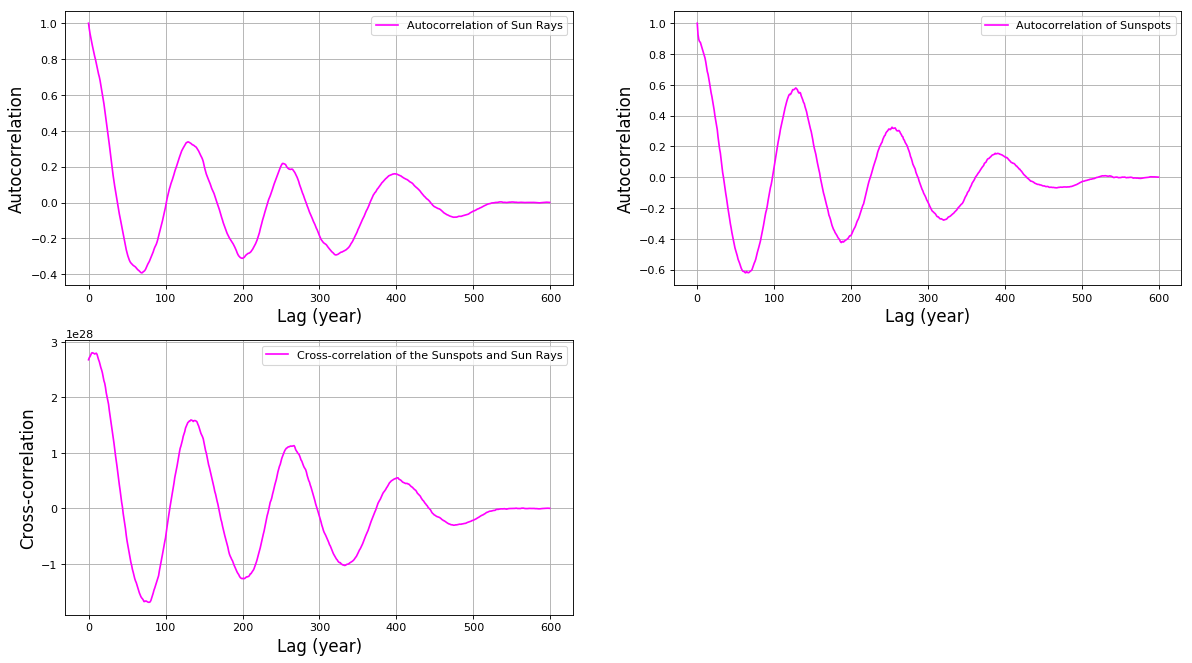

In [44]:
#Just making some more subplots for all three for latex...

f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');

#For the Corrected Count Rates Sun Rays:
sp = f.add_subplot(2, 2, 1);
plt.plot(res_Rays, '-', color="magenta", label='Autocorrelation of Sun Rays');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Autocorrelation", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

#For the Monthly Mean Total Sunspot Number:
sp = f.add_subplot(2, 2, 2);
plt.plot(res_Spots, '-', color="magenta", label='Autocorrelation of Sunspots');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Autocorrelation", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True);

#For the Cross-Correlation of Sun Rays and Sunspots:
sp = f.add_subplot(2, 2, 3);
plt.plot(res_Cross, '-', color="magenta", label='Cross-correlation of the Sunspots and Sun Rays');
plt.xlabel("Lag (year)", fontsize=15);
plt.ylabel("Cross-correlation", fontsize=15);
plt.legend(loc='best', fontsize=10);
plt.grid(True)

plt.show()

In [ ]:
#Number 4

